<a href="https://colab.research.google.com/github/Francilandio07/Trabalho-de-ML-Disciplina-IoT-/blob/main/Parte%201/Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1 do primeiro trabalho da disciplina Jogos Dinâmicos

## Reprodução de tutorial presente no site do Scikit Learn: Reconhecimento de dígitos manuscritos

## 1. Importação de bibliotecas

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# Importando os classificadores adicionais
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Visualizando algumas amostras de imagens da base

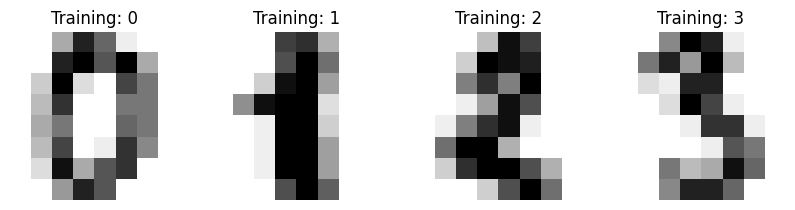

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## 3. Preprocessando as imagens, instanciando os classificadores e dividindo a base em amostras de treino e teste

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Instanciando os classificadores adicionais
clf_KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree', leaf_size = 15, p = 2, metric = 'minkowski', metric_params = None, n_jobs = None)
clf_DT = DecisionTreeClassifier(criterion = 'log_loss', splitter = 'random', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 'log2', random_state = 42)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Treinando os classificadores adicionais
clf_KNN.fit(X_train, y_train)
clf_DT.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Fazendo predições com os classificadores adicionais sobre os dados de teste
predicted_KNN = clf_KNN.predict(X_test)
predicted_DT = clf_DT.predict(X_test)

## 4. Mostrando as 4 primeiras amostras de teste e seus rótulos preditos pelos modelos

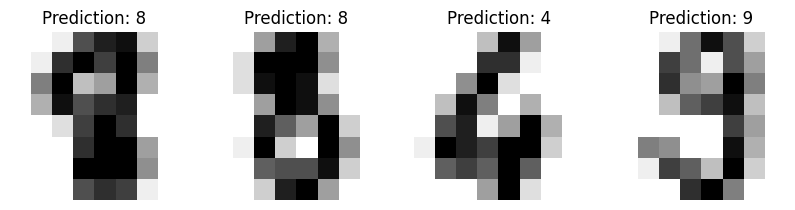

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

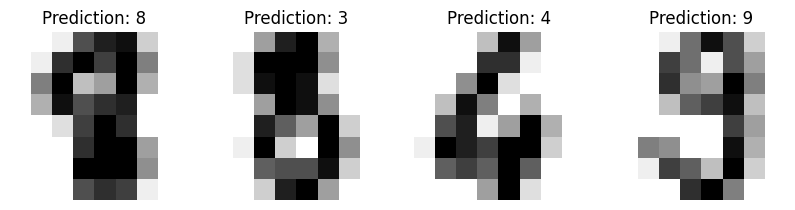

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_KNN):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

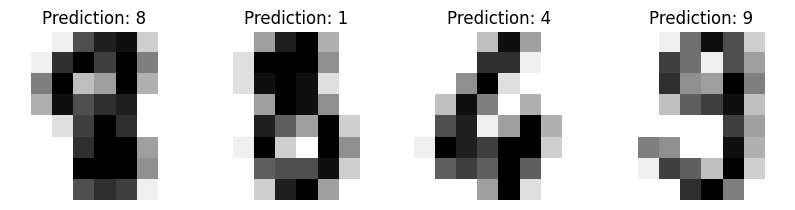

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_DT):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## 5. Visualizando as principais métricas de cada modelo

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [ ]:
print(
    f"Classification report for classifier {clf_KNN}:\n"
    f"{metrics.classification_report(y_test, predicted_KNN)}\n"
)

Classification report for classifier KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=3,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.97      0.97        91
           2       0.99      0.94      0.96        86
           3       0.90      0.91      0.91        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      0.99      0.98        89
           8       0.92      0.95      0.94        88
           9       0.90      0.93      0.91        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




In [ ]:
print(
    f"Classification report for classifier {clf_DT}:\n"
    f"{metrics.classification_report(y_test, predicted_DT)}\n"
)

Classification report for classifier DecisionTreeClassifier(criterion='log_loss', max_features='log2',
                       random_state=42, splitter='random'):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        88
           1       0.67      0.68      0.67        91
           2       0.75      0.69      0.72        86
           3       0.58      0.52      0.55        91
           4       0.59      0.62      0.61        92
           5       0.65      0.58      0.61        91
           6       0.65      0.65      0.65        91
           7       0.75      0.69      0.72        89
           8       0.41      0.48      0.44        88
           9       0.65      0.71      0.68        92

    accuracy                           0.65       899
   macro avg       0.65      0.65      0.65       899
weighted avg       0.65      0.65      0.65       899




In [ ]:
accuracy_SVM = metrics.accuracy_score(y_test, predicted)
accuracy_KNN = metrics.accuracy_score(y_test, predicted_KNN)
accuracy_DT = metrics.accuracy_score(y_test, predicted_DT)

print(f'Acurácia SVM = {accuracy_SVM}\nAcurácia KNN = {accuracy_KNN}\nAcurácia DT = {accuracy_DT}')

Acurácia SVM = 0.9688542825361512
Acurácia KNN = 0.9588431590656284
Acurácia DT = 0.6473859844271412


## 6. Plotando matrizes de confusão de cada modelo

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


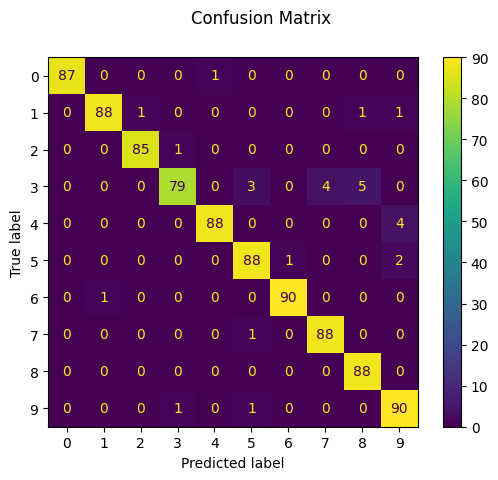

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  0 83  0  1  0  2  3  2]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  2  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


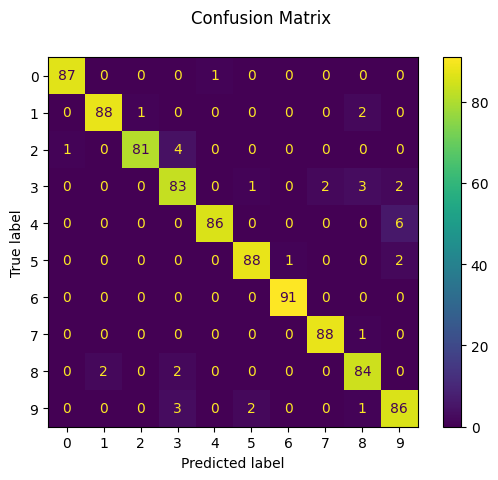

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_KNN)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[77  0  0  0  2  3  1  1  2  2]
 [ 5 62  2  2  5  0  2  1  9  3]
 [ 2  1 59  7  0  3  8  1  4  1]
 [ 2  3  8 47  1  3  1  2  9 15]
 [ 1  3  0  2 57  5  7  7  7  3]
 [ 0  5  1  4  5 53  4  3 13  3]
 [ 3  3  0  1 12  2 59  0  9  2]
 [ 1  3  2 10  4  5  0 61  2  1]
 [ 0 12  7  3  6  5  5  3 42  5]
 [ 3  1  0  5  4  3  4  2  5 65]]


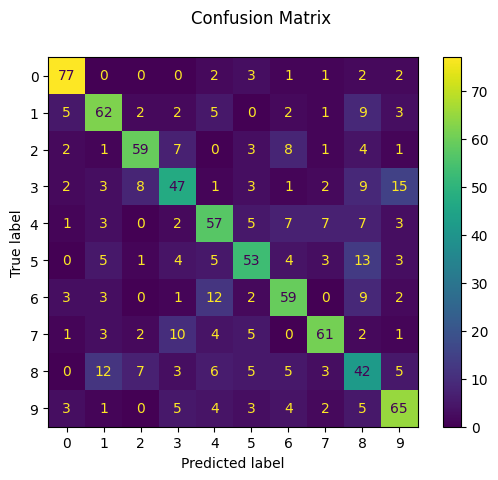

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_DT)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## 7. Gerando gráficos e tabelas que permitem a comparação dos modelos

In [ ]:
# Calculando métricas
accuracy_knn = metrics.accuracy_score(y_test, predicted_KNN)
precision_knn = metrics.precision_score(y_test, predicted_KNN, average='weighted')
recall_knn = metrics.recall_score(y_test, predicted_KNN, average='weighted')

accuracy_dt = metrics.accuracy_score(y_test, predicted_DT)
precision_dt = metrics.precision_score(y_test, predicted_DT, average='weighted')
recall_dt = metrics.recall_score(y_test, predicted_DT, average='weighted')

accuracy_svm = metrics.accuracy_score(y_test, predicted)
precision_svm = metrics.precision_score(y_test, predicted, average='weighted')
recall_svm = metrics.recall_score(y_test, predicted, average='weighted')


In [ ]:
# Criando um dicionário com as métricas
metrics_dict = {
    'Classificador': ['KNN', 'Decision Trees', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_svm],
    'Precision': [precision_knn, precision_dt, precision_svm],
    'Recall': [recall_knn, recall_dt, recall_svm]
}

# Criando o DataFrame
df_metrics = pd.DataFrame(metrics_dict)

# Exibindo o DataFrame
print(df_metrics)


    Classificador  Accuracy  Precision    Recall
0             KNN  0.958843   0.959566  0.958843
1  Decision Trees  0.647386   0.651039  0.647386
2             SVM  0.968854   0.969609  0.968854


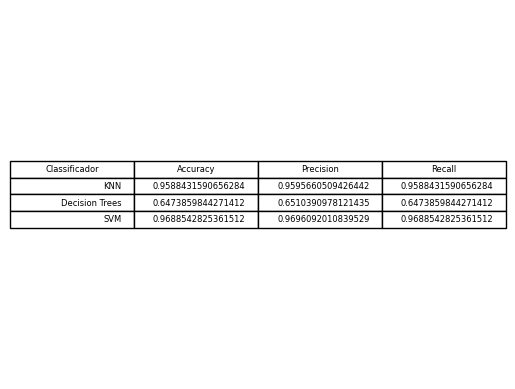

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')  # Oculta os eixos x e y
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, loc='center')

# Salva a imagem como um arquivo PNG
plt.savefig('meu_dataframe.png')

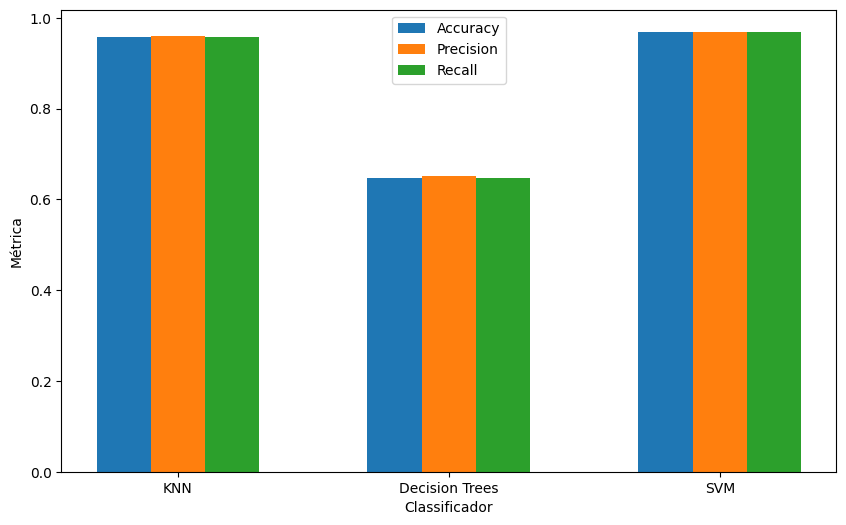

Imagem salva como 'metrics_plot.png'


In [ ]:
# Criando um gráfico de barras para visualizar as métricas
plt.figure(figsize=(10, 6))

# Definindo as posições das barras no eixo x
x = range(len(df_metrics))

# Plotando as barras para cada métrica
plt.bar(x, df_metrics['Accuracy'], width=0.2, label='Accuracy', align='center')
plt.bar([i + 0.2 for i in x], df_metrics['Precision'], width=0.2, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], df_metrics['Recall'], width=0.2, label='Recall', align='center')

# Configurando o eixo x
plt.xticks([i + 0.2 for i in x], df_metrics['Classificador'])
plt.xlabel('Classificador')
plt.ylabel('Métrica')

# Adicionando legendas
plt.legend()

# Salvando a figura em um arquivo
plt.savefig('metrics_plot.png')

# Exibindo o gráfico (opcional)
plt.show()

print("Imagem salva como 'metrics_plot.png'")
